In [1]:
# read words
import numpy as np
import cv2
import glob
from PIL import Image, ImageFont, ImageDraw
import os
import fnmatch
import matplotlib
import random
import math
from matplotlib import pyplot as plt
from pathlib import Path
import matplotlib.image as mpimg
import re
from tqdm import tqdm
import itertools
from scipy import ndimage
from operator import sub

list_of_words = []
map_image = cv2.imread('/media/archan/maps/D5005-5028052.tiff')
dict_of_polygons = np.load('/media/archan/maps_project/annotations/current/D5005-5028052.npy').item()

for i in dict_of_polygons.keys():
    list_of_words.append(dict_of_polygons[i]['name'])
    
# convert the words to images
from gen_small_sample_data import generate_word_images_from_list
fonts_list = []
for root, dirnames, filenames in os.walk('./fonts_new/'):
    for filename in fnmatch.filter(filenames, '*.ttf'):
        fonts_list.append(os.path.join(root, filename))

background_images = []
for i in range(1, 6):
    my_file = Path('./map_textures/map_crop_0' + str(i) + '.jpg')
    if my_file.is_file():
        img = mpimg.imread('./map_textures/map_crop_0' + str(i) + '.jpg')
        background_images.append(img)

In [ ]:
# get synthetic images and save them
sythetic_word_images = generate_word_images_from_list(list_of_words, fonts_list, background_images, padded=False, bg=False)
np.save('sythetic_word_images_nobg_nopad_D5005-5028052.npy', sythetic_word_images)
np.save('list_of_words_nobg_nopad_D5005-5028052.npy', list_of_words)

In [2]:
# load instead of recomputing everything
synthetic_word_images = np.load('sythetic_word_images_nobg_nopad_D5005-5028052.npy')
list_of_words = np.load('list_of_words_nobg_nopad_D5005-5028052.npy')

In [3]:
# load instead of recomputing
original_words = np.load('original_words_nopad_D5005-5028052.npy')
original_images = np.load('original_images_nopad_D5005-5028052.npy')

Dee


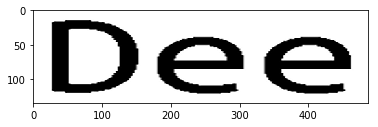

towns


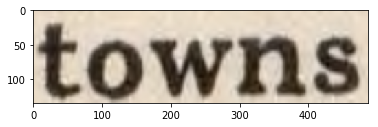

In [4]:
import matplotlib.pyplot as plt
id_1 = np.random.randint(len(list_of_words))
id_2 = np.random.randint(len(original_words))
print(list_of_words[id_1])
plt.imshow(synthetic_word_images[id_1])
plt.show()
print(original_words[id_2])
plt.imshow(original_images[id_2])
plt.show()

In [5]:
# convert all values to the representations
# import stuff
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# import system things
import tensorflow as tf
import numpy as np
import os
import pickle
from util import get_test_results
import cv2
import matplotlib.pyplot as plt

from data_generator_for_siamese import ImageDataGenerator
from datetime import datetime

from helper import get_dataset
import altered_siamese as siamese
import glob
import re

In [6]:
# restore the model we wanty to test with
#batch_size = len(original_words)
batch_size = len(list_of_words)
sess = tf.InteractiveSession()
siamese_model = siamese.siamese_network(batch_size)
saver = tf.train.Saver()
sess.run(tf.global_variables_initializer())

# load the model
saver.restore(sess, './trained_models/siamese9/siamese_with_more_fonts21.ckpt')

Adding Data Augmentation
Adding Data Augmentation
Tensor("Max:0", shape=(), dtype=float32)
INFO:tensorflow:Restoring parameters from ./trained_models/siamese9/siamese_with_more_fonts21.ckpt


In [ ]:
# compute the resultant vectors from original images
resultant_vectors_left = siamese_model.o1.eval({siamese_model.x1: original_images})
np.save('resultant_vectors_left_nopad_D5005-5028052.npy', resultant_vectors_left)

In [8]:
# compute the resultant vectors from synthetic words
resultant_vectors_right = siamese_model.o1.eval({siamese_model.x1: synthetic_word_images})
np.save('resultant_vectors_right_nobg_nopad_D5005-5028052.npy', resultant_vectors_right)

In [9]:
resultant_vectors_left = np.load('resultant_vectors_left_nopad_D5005-5028052.npy')
resultant_vectors_right = np.load('resultant_vectors_right_nobg_nopad_D5005-5028052.npy')

In [10]:
# compute the distances
from scipy.spatial import distance
dis_vals = []
for i in range(len(resultant_vectors_left)):
    dis_vals.append([])
    for j in range(len(resultant_vectors_right)):
        dis_vals[i].append(distance.euclidean(resultant_vectors_left[i],resultant_vectors_right[j]))

the original word is:  N.


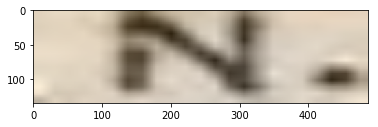

****************************************************************************************************
The matched synthetic images are


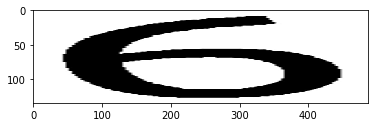

The synthetic word is:  6
Distance: 11.1804428101


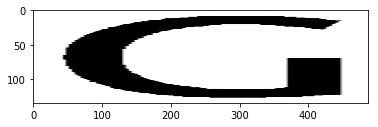

The synthetic word is:  G
Distance: 11.1805057526


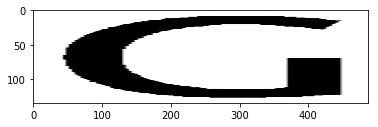

The synthetic word is:  G
Distance: 11.1805057526


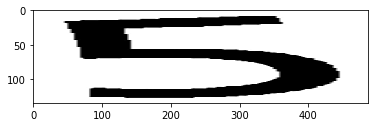

The synthetic word is:  5
Distance: 11.1806583405


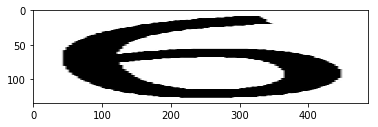

The synthetic word is:  6
Distance: 11.1807022095
****************************************************************************************************
the original word is:  U


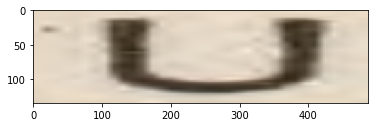

****************************************************************************************************
The matched synthetic images are


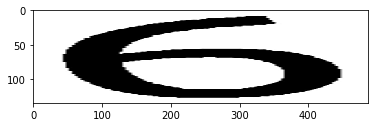

The synthetic word is:  6
Distance: 15.4731464386


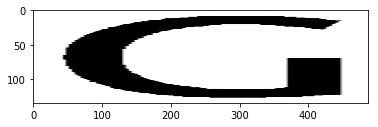

The synthetic word is:  G
Distance: 15.4732093811


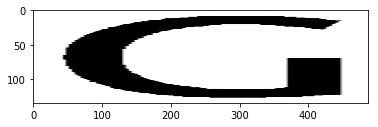

The synthetic word is:  G
Distance: 15.4732093811


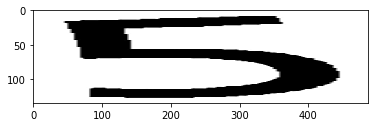

The synthetic word is:  5
Distance: 15.473361969


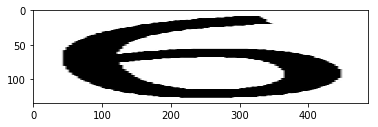

The synthetic word is:  6
Distance: 15.473405838
****************************************************************************************************
the original word is:  Kings


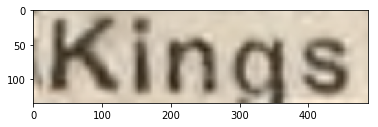

****************************************************************************************************
The matched synthetic images are


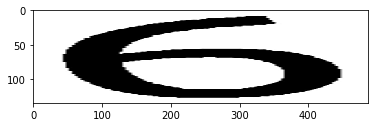

The synthetic word is:  6
Distance: 15.3431911469


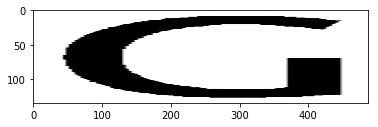

The synthetic word is:  G
Distance: 15.3432531357


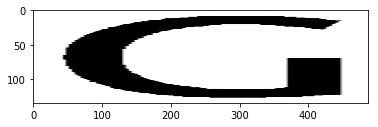

The synthetic word is:  G
Distance: 15.3432531357


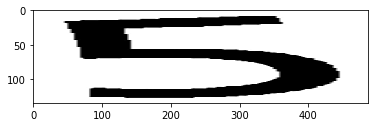

The synthetic word is:  5
Distance: 15.3434066772


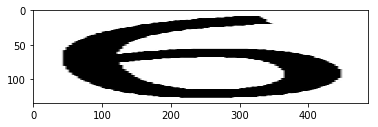

The synthetic word is:  6
Distance: 15.3434495926
****************************************************************************************************
the original word is:  Bennett


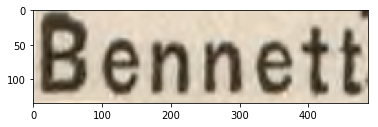

****************************************************************************************************
The matched synthetic images are


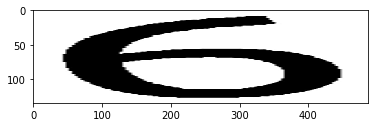

The synthetic word is:  6
Distance: 5.47048807144


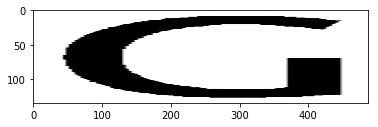

The synthetic word is:  G
Distance: 5.47055053711


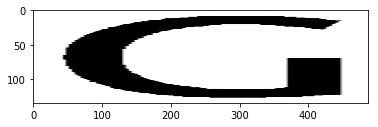

The synthetic word is:  G
Distance: 5.47055053711


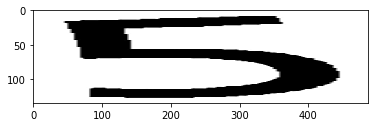

The synthetic word is:  5
Distance: 5.47070264816


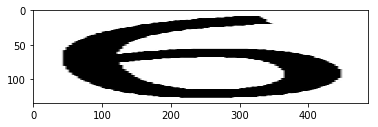

The synthetic word is:  6
Distance: 5.47074604034
****************************************************************************************************
the original word is:  Blue


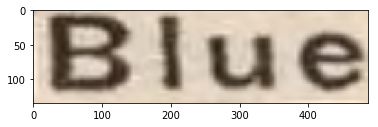

****************************************************************************************************
The matched synthetic images are


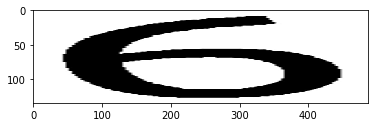

The synthetic word is:  6
Distance: 7.73492002487


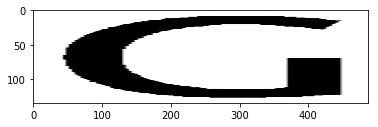

The synthetic word is:  G
Distance: 7.73498296738


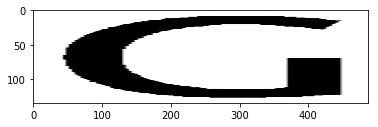

The synthetic word is:  G
Distance: 7.73498296738


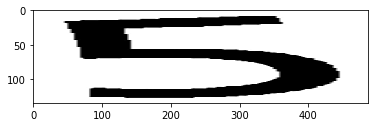

The synthetic word is:  5
Distance: 7.73513650894


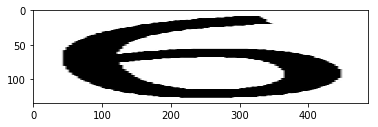

The synthetic word is:  6
Distance: 7.73517990112
****************************************************************************************************
the original word is:  C.


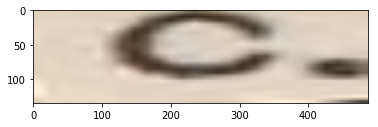

****************************************************************************************************
The matched synthetic images are


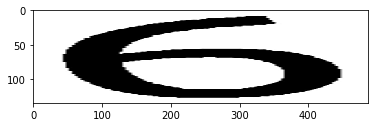

The synthetic word is:  6
Distance: 13.4082460403


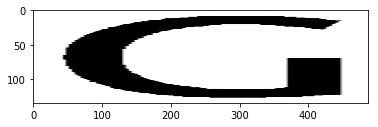

The synthetic word is:  G
Distance: 13.4083089828


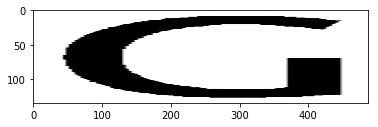

The synthetic word is:  G
Distance: 13.4083089828


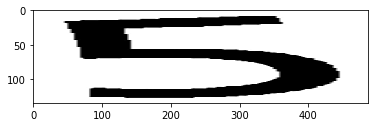

The synthetic word is:  5
Distance: 13.4084625244


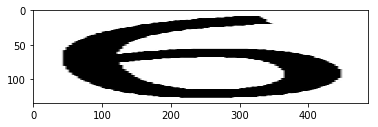

The synthetic word is:  6
Distance: 13.4085054398
****************************************************************************************************
the original word is:  AVERY


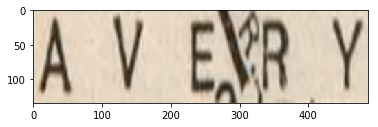

****************************************************************************************************
The matched synthetic images are


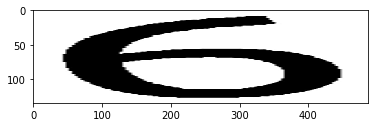

The synthetic word is:  6
Distance: 22.2194576263


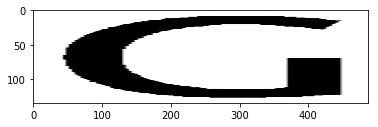

The synthetic word is:  G
Distance: 22.2195205688


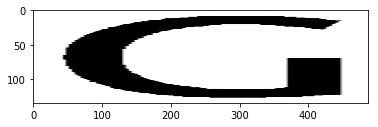

The synthetic word is:  G
Distance: 22.2195205688


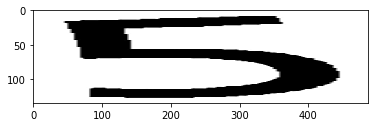

The synthetic word is:  5
Distance: 22.2196731567


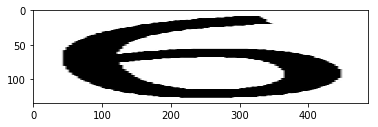

The synthetic word is:  6
Distance: 22.2197170258
****************************************************************************************************
the original word is:  Kenly


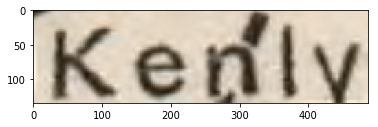

****************************************************************************************************
The matched synthetic images are


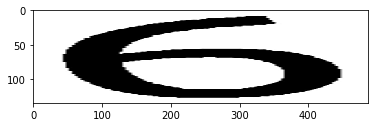

The synthetic word is:  6
Distance: 3.01683306694


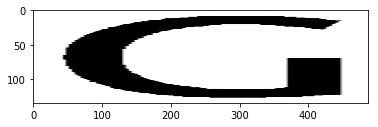

The synthetic word is:  G
Distance: 3.01689052582


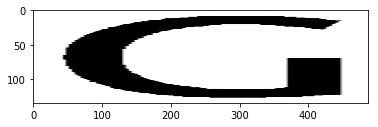

The synthetic word is:  G
Distance: 3.01689052582


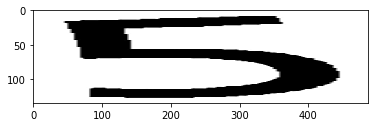

The synthetic word is:  5
Distance: 3.01703047752


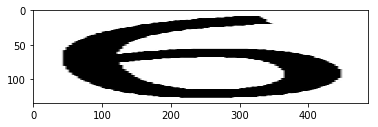

The synthetic word is:  6
Distance: 3.01707029343
****************************************************************************************************
the original word is:  NOR.


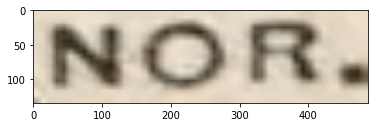

****************************************************************************************************
The matched synthetic images are


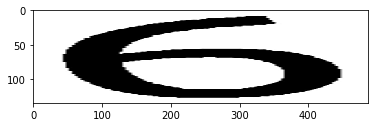

The synthetic word is:  6
Distance: 5.9451341629


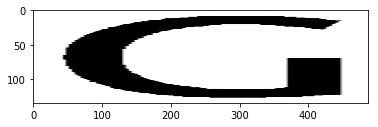

The synthetic word is:  G
Distance: 5.94519662857


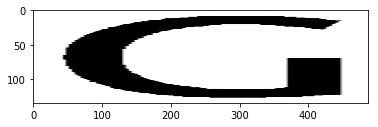

The synthetic word is:  G
Distance: 5.94519662857


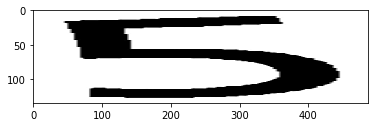

The synthetic word is:  5
Distance: 5.94534921646


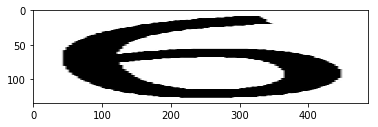

The synthetic word is:  6
Distance: 5.94539260864
****************************************************************************************************
the original word is:  22


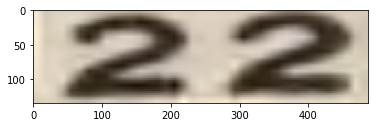

****************************************************************************************************
The matched synthetic images are


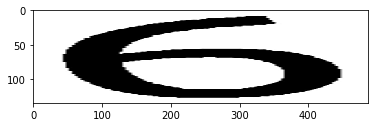

The synthetic word is:  6
Distance: 3.05667304993


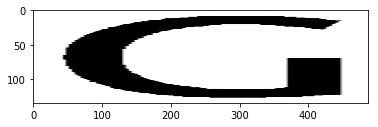

The synthetic word is:  G
Distance: 3.0567305088


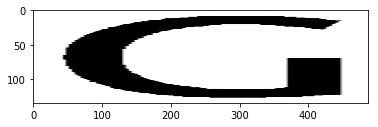

The synthetic word is:  G
Distance: 3.0567305088


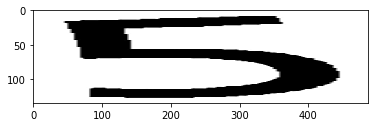

The synthetic word is:  5
Distance: 3.05687093735


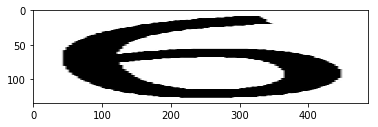

The synthetic word is:  6
Distance: 3.05691075325
****************************************************************************************************
the original word is:  Waynesville


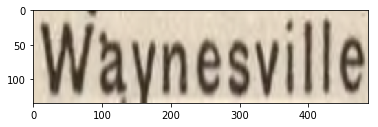

****************************************************************************************************
The matched synthetic images are


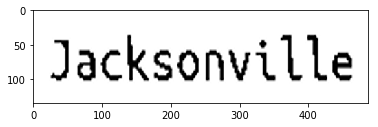

The synthetic word is:  Jacksonville
Distance: 48.9013977051


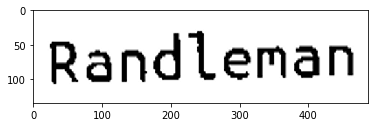

The synthetic word is:  Randleman
Distance: 48.9014282227


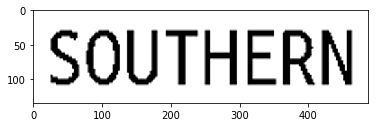

The synthetic word is:  SOUTHERN
Distance: 48.9014511108


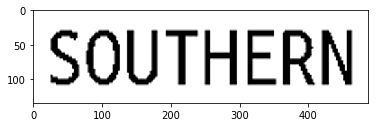

The synthetic word is:  SOUTHERN
Distance: 48.9014511108


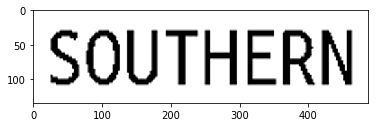

The synthetic word is:  SOUTHERN
Distance: 48.9014511108
****************************************************************************************************
the original word is:  Kelford


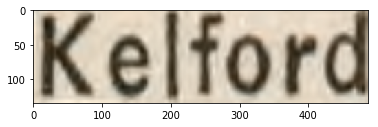

****************************************************************************************************
The matched synthetic images are


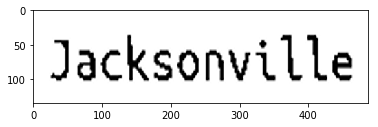

The synthetic word is:  Jacksonville
Distance: 46.206615448


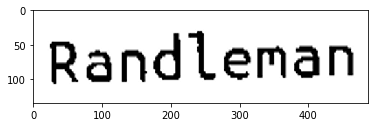

The synthetic word is:  Randleman
Distance: 46.2066459656


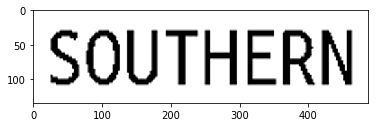

The synthetic word is:  SOUTHERN
Distance: 46.2066688538


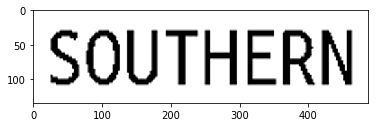

The synthetic word is:  SOUTHERN
Distance: 46.2066688538


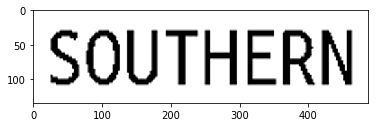

The synthetic word is:  SOUTHERN
Distance: 46.2066688538
****************************************************************************************************
the original word is:  Hobgood


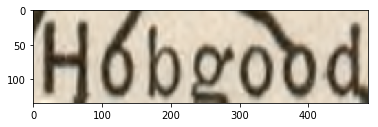

****************************************************************************************************
The matched synthetic images are


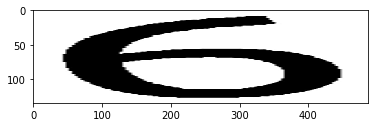

The synthetic word is:  6
Distance: 22.8007698059


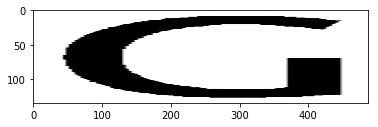

The synthetic word is:  G
Distance: 22.8008308411


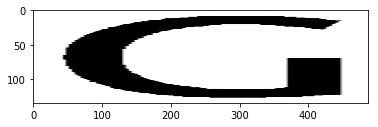

The synthetic word is:  G
Distance: 22.8008308411


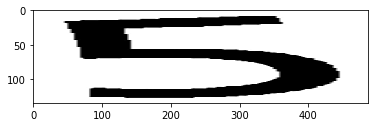

The synthetic word is:  5
Distance: 22.800983429


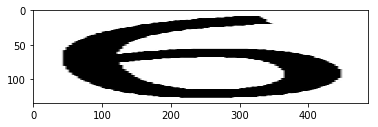

The synthetic word is:  6
Distance: 22.801027298
****************************************************************************************************
the original word is:  Ran


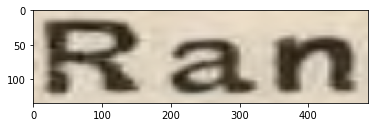

****************************************************************************************************
The matched synthetic images are


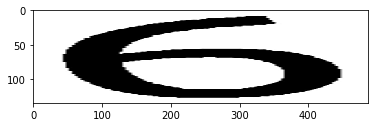

The synthetic word is:  6
Distance: 24.654964447


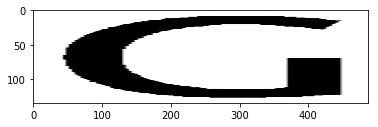

The synthetic word is:  G
Distance: 24.6550273895


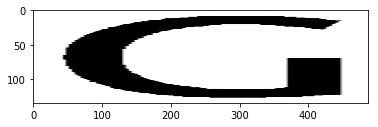

The synthetic word is:  G
Distance: 24.6550273895


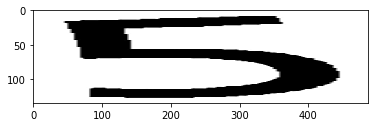

The synthetic word is:  5
Distance: 24.6551780701


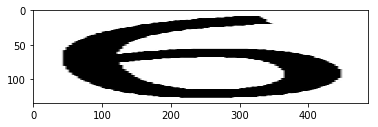

The synthetic word is:  6
Distance: 24.6552219391
****************************************************************************************************
the original word is:  SOU.


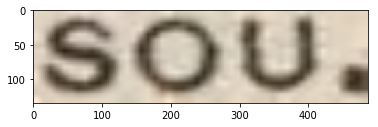

****************************************************************************************************
The matched synthetic images are


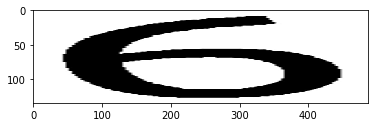

The synthetic word is:  6
Distance: 10.3173418045


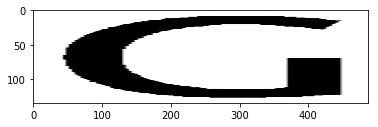

The synthetic word is:  G
Distance: 10.317404747


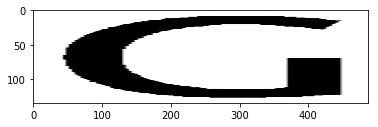

The synthetic word is:  G
Distance: 10.317404747


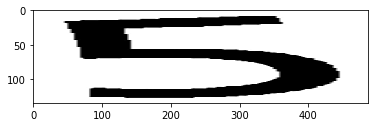

The synthetic word is:  5
Distance: 10.3175582886


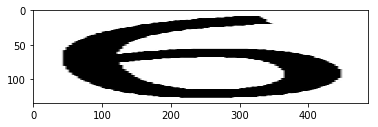

The synthetic word is:  6
Distance: 10.3176021576
****************************************************************************************************
the original word is:  T


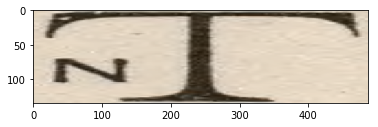

****************************************************************************************************
The matched synthetic images are


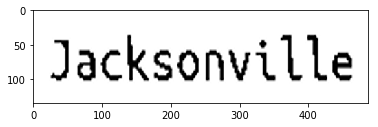

The synthetic word is:  Jacksonville
Distance: 18.1318912506


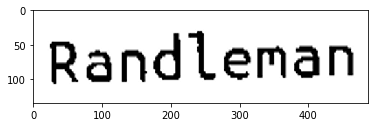

The synthetic word is:  Randleman
Distance: 18.1319198608


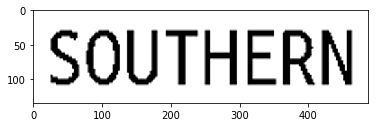

The synthetic word is:  SOUTHERN
Distance: 18.1319389343


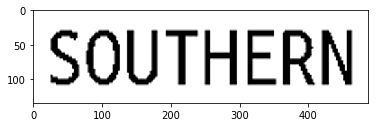

The synthetic word is:  SOUTHERN
Distance: 18.1319389343


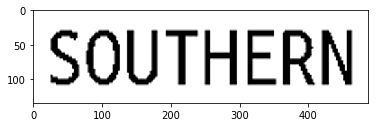

The synthetic word is:  SOUTHERN
Distance: 18.1319389343
****************************************************************************************************
the original word is:  SEA


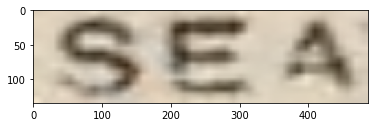

****************************************************************************************************
The matched synthetic images are


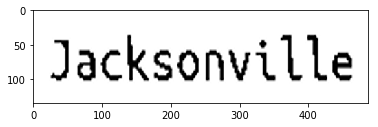

The synthetic word is:  Jacksonville
Distance: 43.7438163757


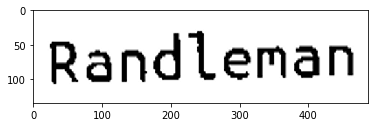

The synthetic word is:  Randleman
Distance: 43.7438468933


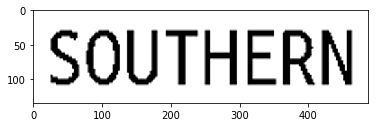

The synthetic word is:  SOUTHERN
Distance: 43.7438697815


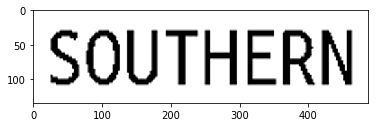

The synthetic word is:  SOUTHERN
Distance: 43.7438697815


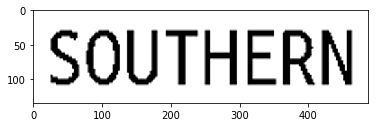

The synthetic word is:  SOUTHERN
Distance: 43.7438697815
****************************************************************************************************
the original word is:  E


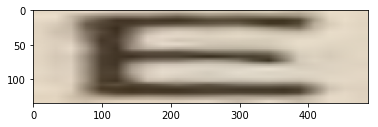

****************************************************************************************************
The matched synthetic images are


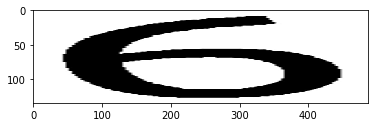

The synthetic word is:  6
Distance: 3.71775555611


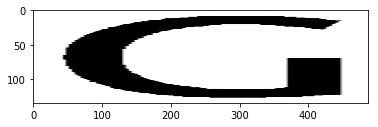

The synthetic word is:  G
Distance: 3.71781587601


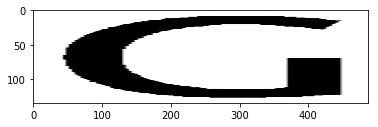

The synthetic word is:  G
Distance: 3.71781587601


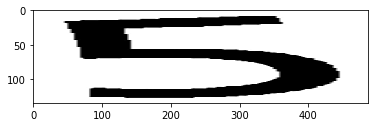

The synthetic word is:  5
Distance: 3.71796274185


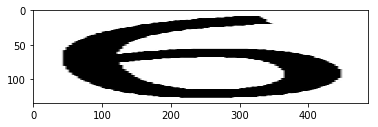

The synthetic word is:  6
Distance: 3.7180044651
****************************************************************************************************
the original word is:  16


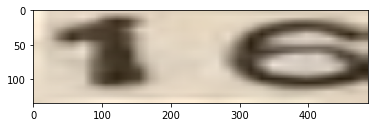

****************************************************************************************************
The matched synthetic images are


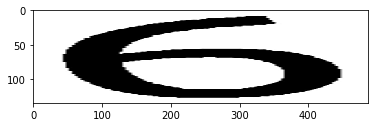

The synthetic word is:  6
Distance: 25.4125995636


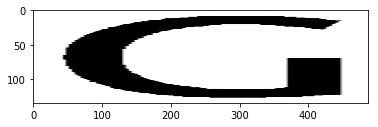

The synthetic word is:  G
Distance: 25.4126605988


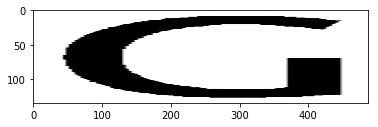

The synthetic word is:  G
Distance: 25.4126605988


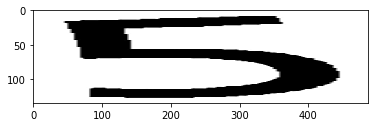

The synthetic word is:  5
Distance: 25.4128112793


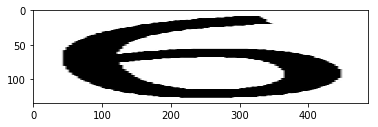

The synthetic word is:  6
Distance: 25.4128551483
****************************************************************************************************
the original word is:  Sou.


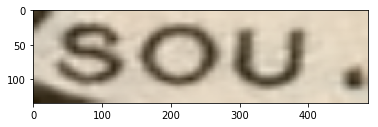

****************************************************************************************************
The matched synthetic images are


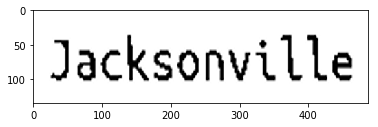

The synthetic word is:  Jacksonville
Distance: 35.0195007324


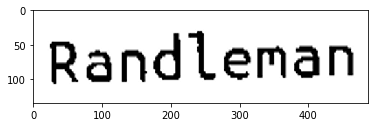

The synthetic word is:  Randleman
Distance: 35.01953125


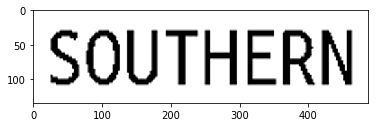

The synthetic word is:  SOUTHERN
Distance: 35.0195541382


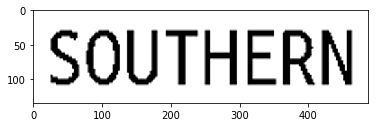

The synthetic word is:  SOUTHERN
Distance: 35.0195541382


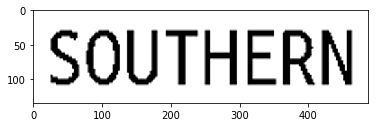

The synthetic word is:  SOUTHERN
Distance: 35.0195541382
****************************************************************************************************
the original word is:  WASHI


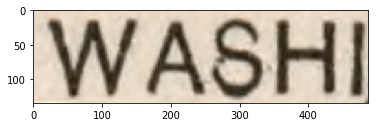

****************************************************************************************************
The matched synthetic images are


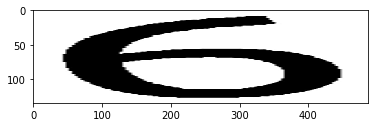

The synthetic word is:  6
Distance: 23.9633026123


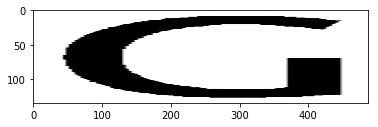

The synthetic word is:  G
Distance: 23.9633655548


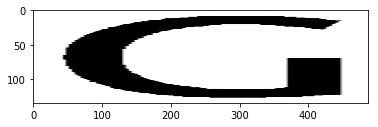

The synthetic word is:  G
Distance: 23.9633655548


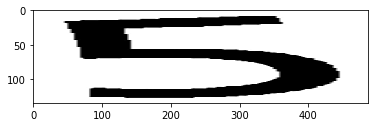

The synthetic word is:  5
Distance: 23.9635162354


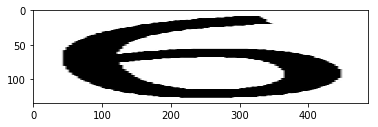

The synthetic word is:  6
Distance: 23.9635601044
****************************************************************************************************
the original word is:  1


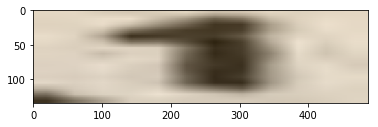

****************************************************************************************************
The matched synthetic images are


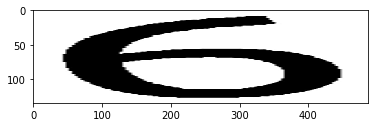

The synthetic word is:  6
Distance: 27.3348312378


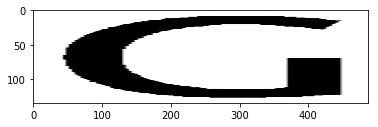

The synthetic word is:  G
Distance: 27.3348941803


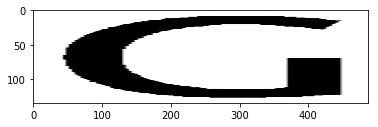

The synthetic word is:  G
Distance: 27.3348941803


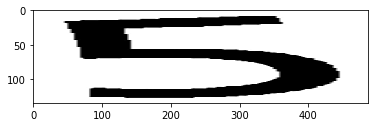

The synthetic word is:  5
Distance: 27.3350448608


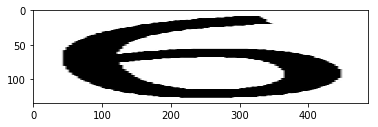

The synthetic word is:  6
Distance: 27.3350887299
****************************************************************************************************
the original word is:  Warsaw


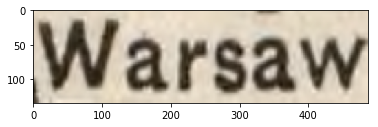

****************************************************************************************************
The matched synthetic images are


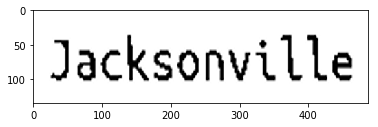

The synthetic word is:  Jacksonville
Distance: 45.7604866028


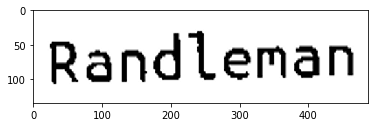

The synthetic word is:  Randleman
Distance: 45.7605133057


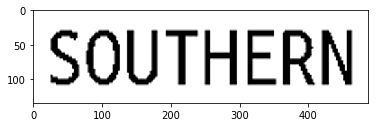

The synthetic word is:  SOUTHERN
Distance: 45.7605361938


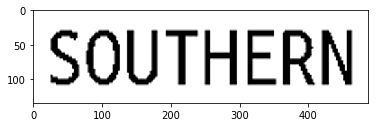

The synthetic word is:  SOUTHERN
Distance: 45.7605361938


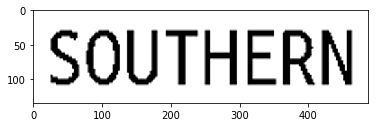

The synthetic word is:  SOUTHERN
Distance: 45.7605361938
****************************************************************************************************
the original word is:  7


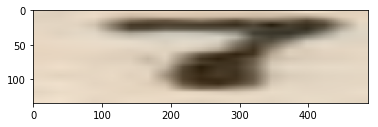

****************************************************************************************************
The matched synthetic images are


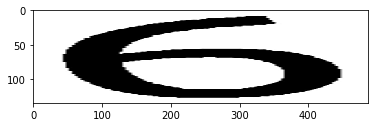

The synthetic word is:  6
Distance: 9.82879829407


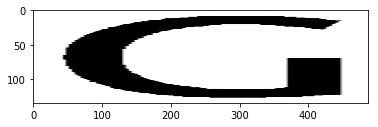

The synthetic word is:  G
Distance: 9.82886123657


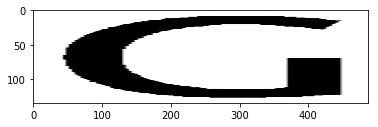

The synthetic word is:  G
Distance: 9.82886123657


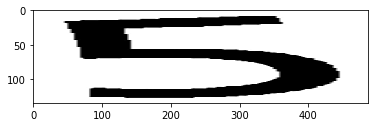

The synthetic word is:  5
Distance: 9.82901477814


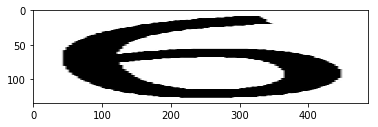

The synthetic word is:  6
Distance: 9.82905769348
****************************************************************************************************
the original word is:  W.-S.


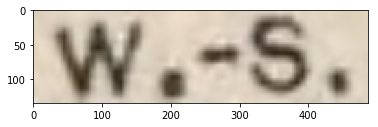

****************************************************************************************************
The matched synthetic images are


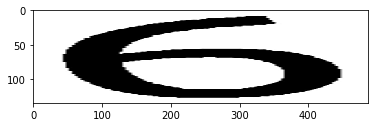

The synthetic word is:  6
Distance: 9.28183841705


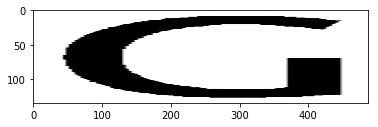

The synthetic word is:  G
Distance: 9.28190135956


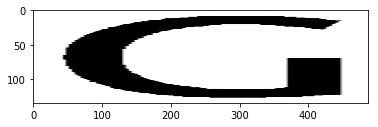

The synthetic word is:  G
Distance: 9.28190135956


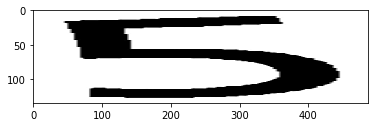

The synthetic word is:  5
Distance: 9.28205490112


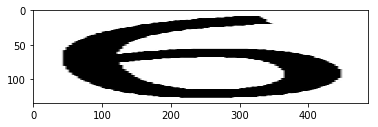

The synthetic word is:  6
Distance: 9.28209781647
****************************************************************************************************
the original word is:  O


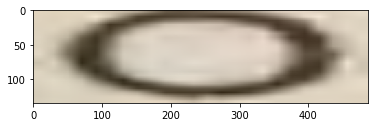

****************************************************************************************************
The matched synthetic images are


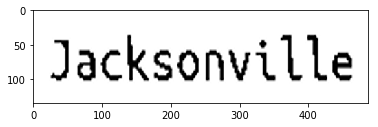

The synthetic word is:  Jacksonville
Distance: 60.7788619995


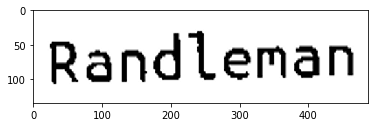

The synthetic word is:  Randleman
Distance: 60.7788887024


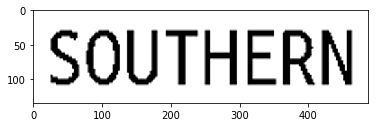

The synthetic word is:  SOUTHERN
Distance: 60.7789115906


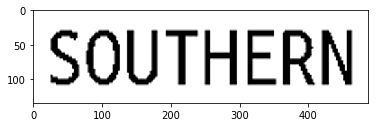

The synthetic word is:  SOUTHERN
Distance: 60.7789115906


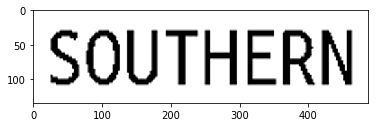

The synthetic word is:  SOUTHERN
Distance: 60.7789115906
****************************************************************************************************
the original word is:  L


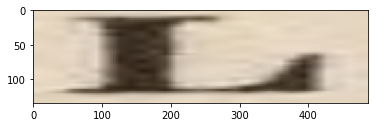

****************************************************************************************************
The matched synthetic images are


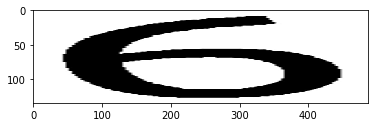

The synthetic word is:  6
Distance: 24.8821105957


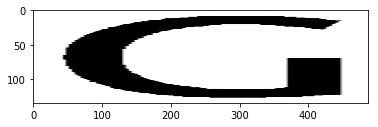

The synthetic word is:  G
Distance: 24.8821735382


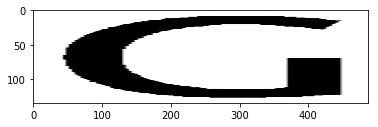

The synthetic word is:  G
Distance: 24.8821735382


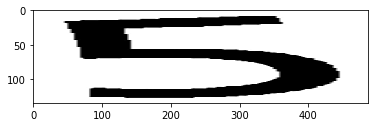

The synthetic word is:  5
Distance: 24.8823242188


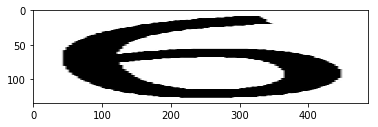

The synthetic word is:  6
Distance: 24.8823680878
****************************************************************************************************
the original word is:  7


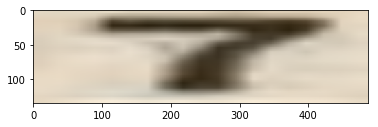

****************************************************************************************************
The matched synthetic images are


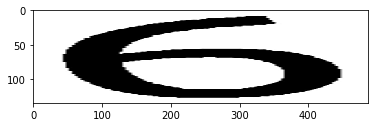

The synthetic word is:  6
Distance: 7.53239536285


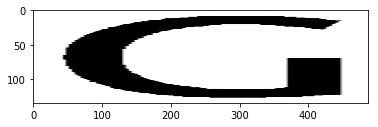

The synthetic word is:  G
Distance: 7.5324587822


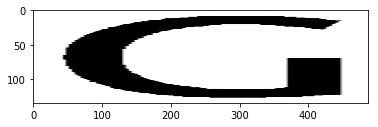

The synthetic word is:  G
Distance: 7.5324587822


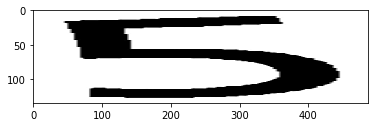

The synthetic word is:  5
Distance: 7.53261184692


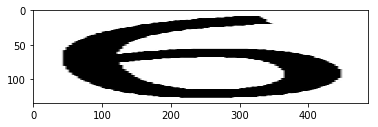

The synthetic word is:  6
Distance: 7.53265523911
****************************************************************************************************
the original word is:  C.


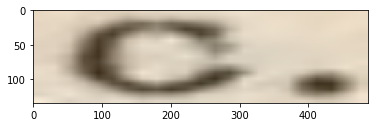

****************************************************************************************************
The matched synthetic images are


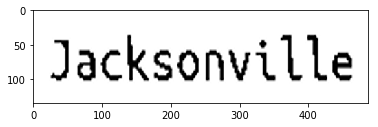

The synthetic word is:  Jacksonville
Distance: 12.6271686554


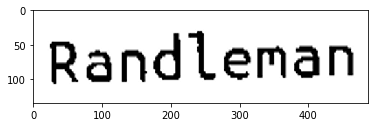

The synthetic word is:  Randleman
Distance: 12.6271972656


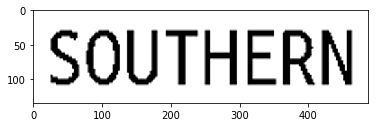

The synthetic word is:  SOUTHERN
Distance: 12.6272163391


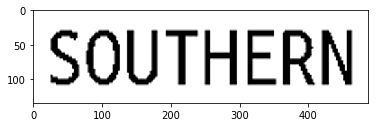

The synthetic word is:  SOUTHERN
Distance: 12.6272163391


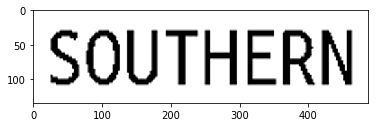

The synthetic word is:  SOUTHERN
Distance: 12.6272163391
****************************************************************************************************
the original word is:  Plains


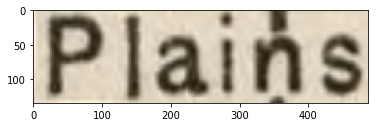

****************************************************************************************************
The matched synthetic images are


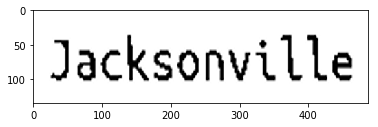

The synthetic word is:  Jacksonville
Distance: 55.7425842285


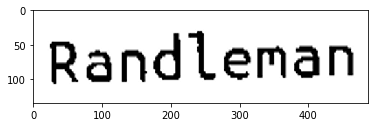

The synthetic word is:  Randleman
Distance: 55.7426147461


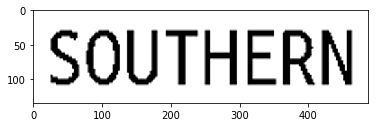

The synthetic word is:  SOUTHERN
Distance: 55.7426376343


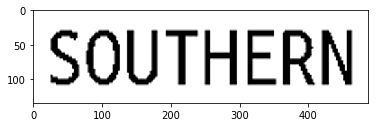

The synthetic word is:  SOUTHERN
Distance: 55.7426376343


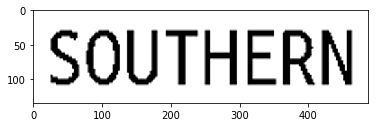

The synthetic word is:  SOUTHERN
Distance: 55.7426376343
****************************************************************************************************
the original word is:  3


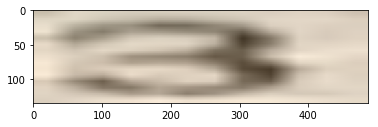

****************************************************************************************************
The matched synthetic images are


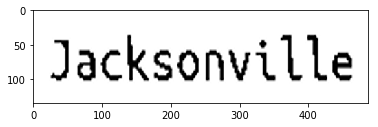

The synthetic word is:  Jacksonville
Distance: 30.1875171661


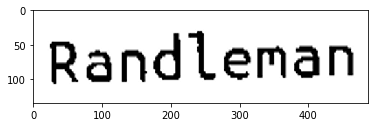

The synthetic word is:  Randleman
Distance: 30.1875476837


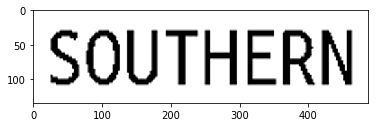

The synthetic word is:  SOUTHERN
Distance: 30.1875686646


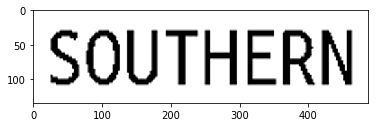

The synthetic word is:  SOUTHERN
Distance: 30.1875686646


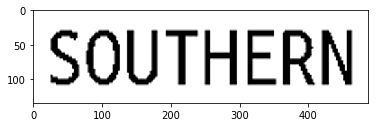

The synthetic word is:  SOUTHERN
Distance: 30.1875686646
****************************************************************************************************
the original word is:  CO.


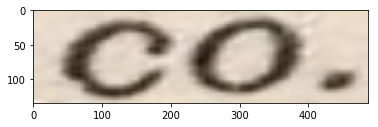

****************************************************************************************************
The matched synthetic images are


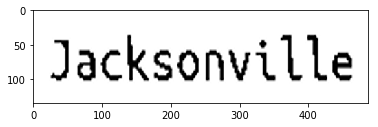

The synthetic word is:  Jacksonville
Distance: 5.99696016312


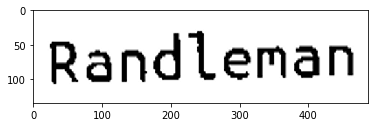

The synthetic word is:  Randleman
Distance: 5.99698543549


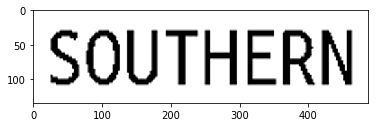

The synthetic word is:  SOUTHERN
Distance: 5.99700307846


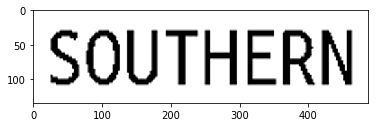

The synthetic word is:  SOUTHERN
Distance: 5.99700307846


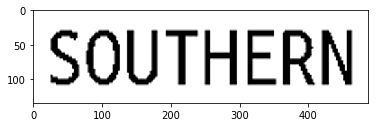

The synthetic word is:  SOUTHERN
Distance: 5.99700307846
****************************************************************************************************
the original word is:  Wenona


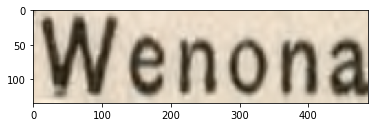

****************************************************************************************************
The matched synthetic images are


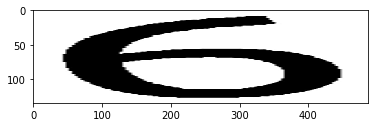

The synthetic word is:  6
Distance: 3.9823949337


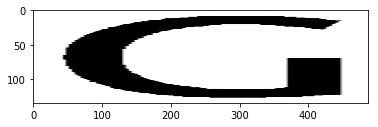

The synthetic word is:  G
Distance: 3.98245573044


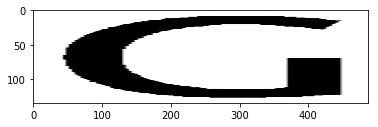

The synthetic word is:  G
Distance: 3.98245573044


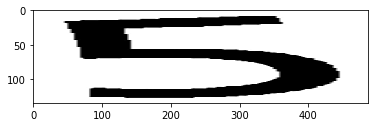

The synthetic word is:  5
Distance: 3.98260426521


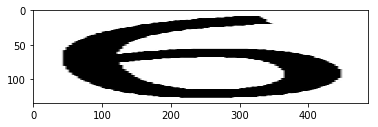

The synthetic word is:  6
Distance: 3.9826464653
****************************************************************************************************
the original word is:  ANSON


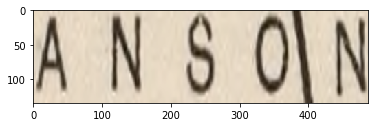

****************************************************************************************************
The matched synthetic images are


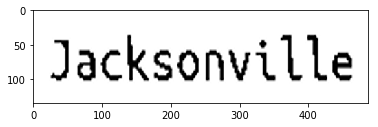

The synthetic word is:  Jacksonville
Distance: 64.270690918


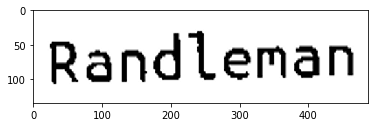

The synthetic word is:  Randleman
Distance: 64.2707214355


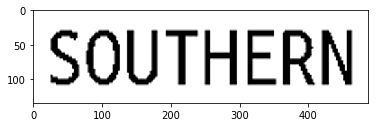

The synthetic word is:  SOUTHERN
Distance: 64.2707443237


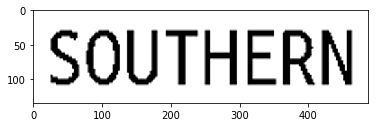

The synthetic word is:  SOUTHERN
Distance: 64.2707443237


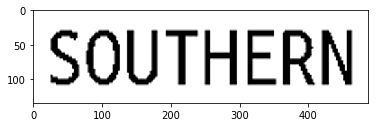

The synthetic word is:  SOUTHERN
Distance: 64.2707443237
****************************************************************************************************
the original word is:  S


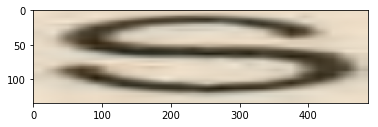

****************************************************************************************************
The matched synthetic images are


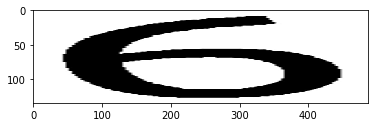

The synthetic word is:  6
Distance: 11.4505825043


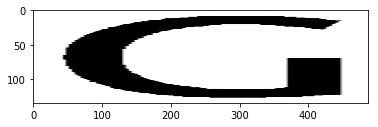

The synthetic word is:  G
Distance: 11.4506454468


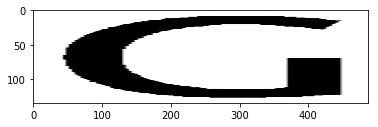

The synthetic word is:  G
Distance: 11.4506454468


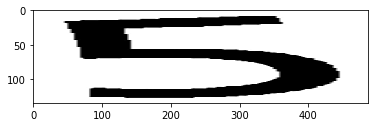

The synthetic word is:  5
Distance: 11.4507989883


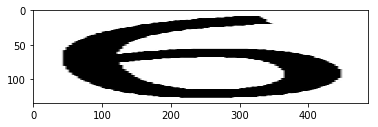

The synthetic word is:  6
Distance: 11.4508419037
****************************************************************************************************
the original word is:  La


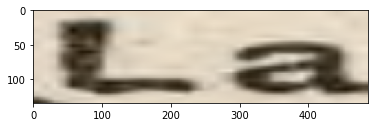

****************************************************************************************************
The matched synthetic images are


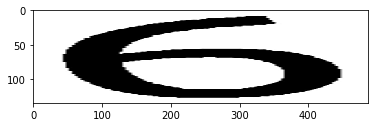

The synthetic word is:  6
Distance: 7.86982536316


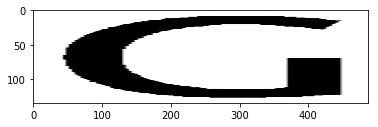

The synthetic word is:  G
Distance: 7.86988830566


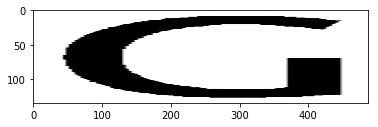

The synthetic word is:  G
Distance: 7.86988830566


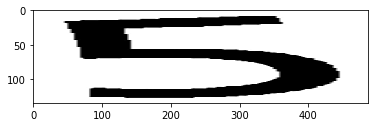

The synthetic word is:  5
Distance: 7.87004137039


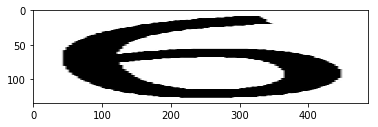

The synthetic word is:  6
Distance: 7.87008523941
****************************************************************************************************
the original word is:  Halifax


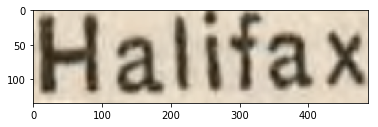

****************************************************************************************************
The matched synthetic images are


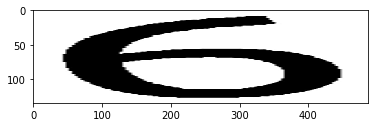

The synthetic word is:  6
Distance: 22.6292819977


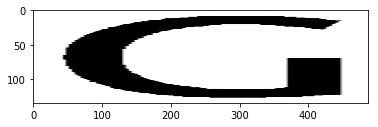

The synthetic word is:  G
Distance: 22.6293430328


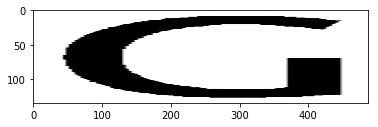

The synthetic word is:  G
Distance: 22.6293430328


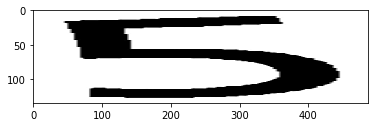

The synthetic word is:  5
Distance: 22.6294956207


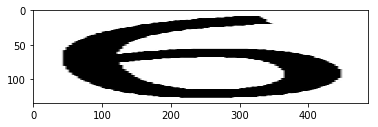

The synthetic word is:  6
Distance: 22.6295394897
****************************************************************************************************
the original word is:  20


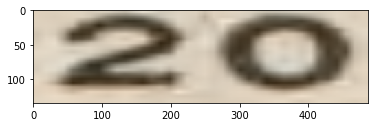

****************************************************************************************************
The matched synthetic images are


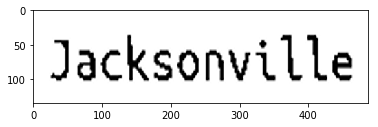

The synthetic word is:  Jacksonville
Distance: 22.0529193878


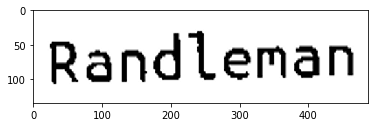

The synthetic word is:  Randleman
Distance: 22.052947998


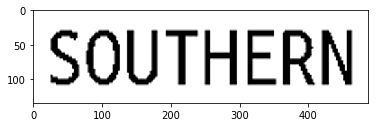

The synthetic word is:  SOUTHERN
Distance: 22.0529689789


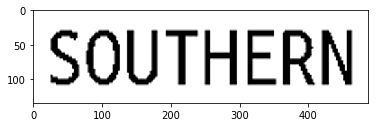

The synthetic word is:  SOUTHERN
Distance: 22.0529689789


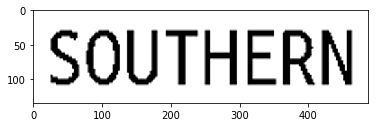

The synthetic word is:  SOUTHERN
Distance: 22.0529689789
****************************************************************************************************
the original word is:  LINE


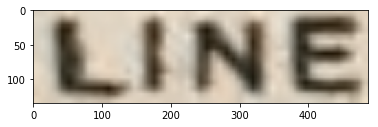

****************************************************************************************************
The matched synthetic images are


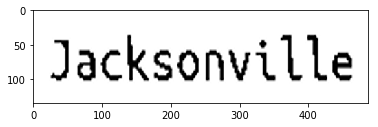

The synthetic word is:  Jacksonville
Distance: 2.00027227402


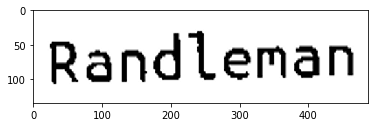

The synthetic word is:  Randleman
Distance: 2.00027394295


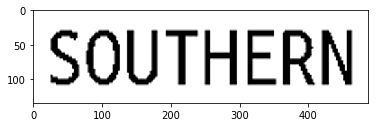

The synthetic word is:  SOUTHERN
Distance: 2.00027513504


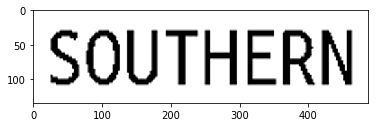

The synthetic word is:  SOUTHERN
Distance: 2.00027513504


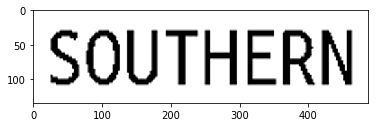

The synthetic word is:  SOUTHERN
Distance: 2.00027513504
****************************************************************************************************
the original word is:  COAST


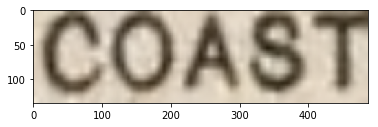

****************************************************************************************************
The matched synthetic images are


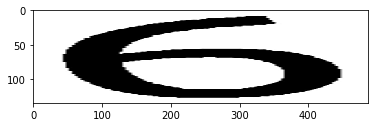

The synthetic word is:  6
Distance: 31.9429206848


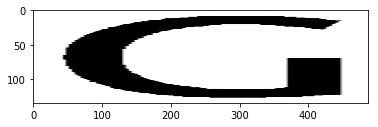

The synthetic word is:  G
Distance: 31.9429836273


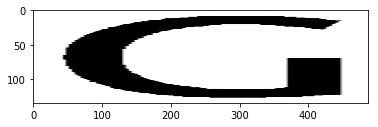

The synthetic word is:  G
Distance: 31.9429836273


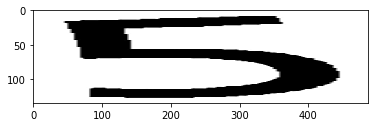

The synthetic word is:  5
Distance: 31.9431343079


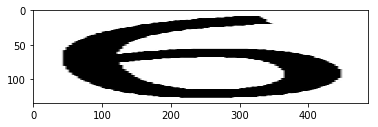

The synthetic word is:  6
Distance: 31.9431762695
****************************************************************************************************
the original word is:  Jefferson


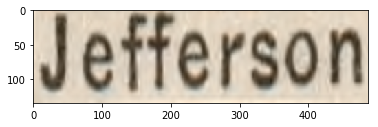

****************************************************************************************************
The matched synthetic images are


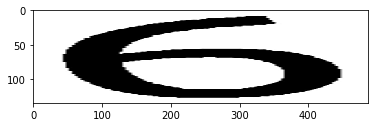

The synthetic word is:  6
Distance: 5.10405492783


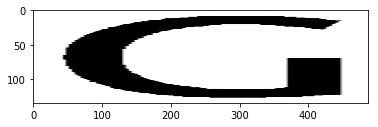

The synthetic word is:  G
Distance: 5.10411739349


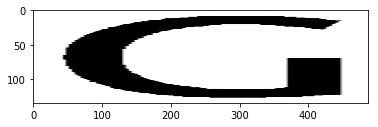

The synthetic word is:  G
Distance: 5.10411739349


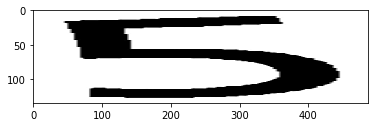

The synthetic word is:  5
Distance: 5.10426902771


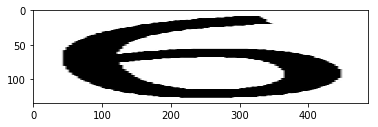

The synthetic word is:  6
Distance: 5.10431194305
****************************************************************************************************
the original word is:  S.


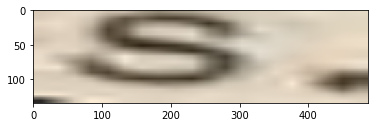

****************************************************************************************************
The matched synthetic images are


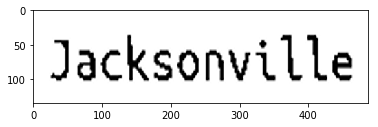

The synthetic word is:  Jacksonville
Distance: 38.0108299255


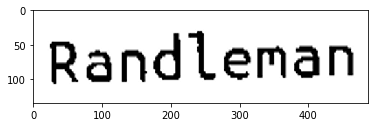

The synthetic word is:  Randleman
Distance: 38.0108604431


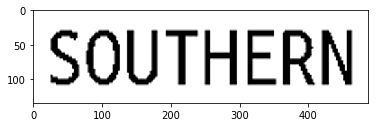

The synthetic word is:  SOUTHERN
Distance: 38.0108833313


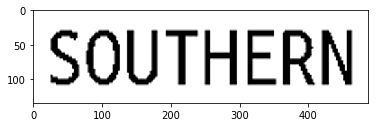

The synthetic word is:  SOUTHERN
Distance: 38.0108833313


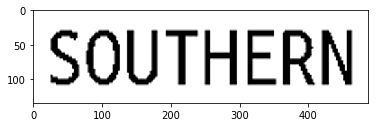

The synthetic word is:  SOUTHERN
Distance: 38.0108833313
****************************************************************************************************
the original word is:  P.


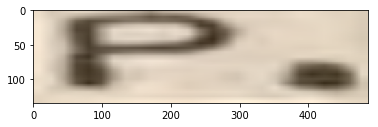

****************************************************************************************************
The matched synthetic images are


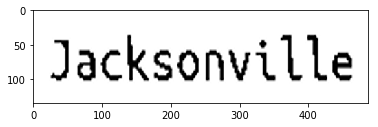

The synthetic word is:  Jacksonville
Distance: 50.2170715332


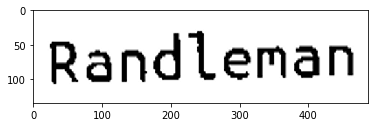

The synthetic word is:  Randleman
Distance: 50.2171020508


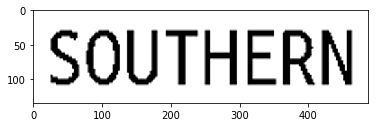

The synthetic word is:  SOUTHERN
Distance: 50.217124939


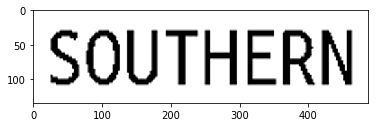

The synthetic word is:  SOUTHERN
Distance: 50.217124939


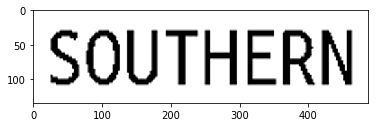

The synthetic word is:  SOUTHERN
Distance: 50.217124939
****************************************************************************************************
the original word is:  C.


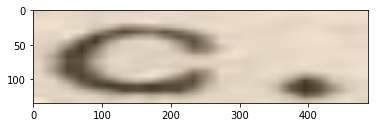

****************************************************************************************************
The matched synthetic images are


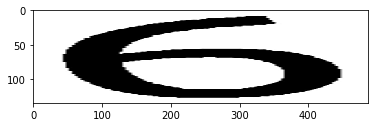

The synthetic word is:  6
Distance: 5.50797891617


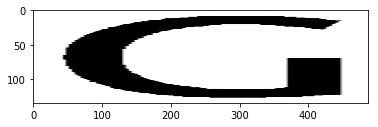

The synthetic word is:  G
Distance: 5.50804138184


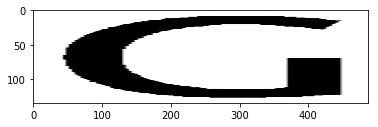

The synthetic word is:  G
Distance: 5.50804138184


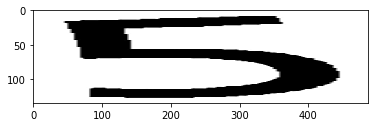

The synthetic word is:  5
Distance: 5.50819396973


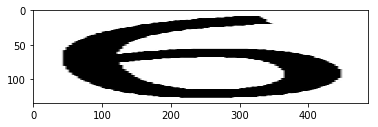

The synthetic word is:  6
Distance: 5.50823736191
****************************************************************************************************
the original word is:  Towns


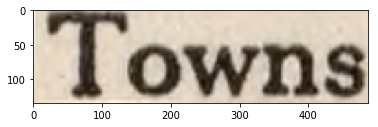

****************************************************************************************************
The matched synthetic images are


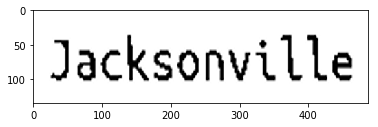

The synthetic word is:  Jacksonville
Distance: 22.8741035461


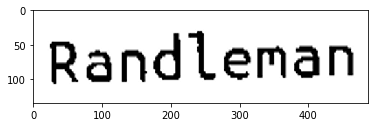

The synthetic word is:  Randleman
Distance: 22.8741321564


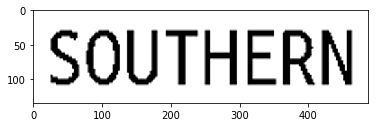

The synthetic word is:  SOUTHERN
Distance: 22.8741531372


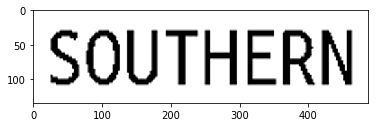

The synthetic word is:  SOUTHERN
Distance: 22.8741531372


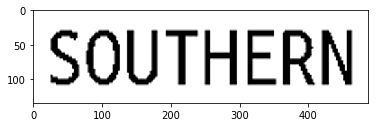

The synthetic word is:  SOUTHERN
Distance: 22.8741531372
****************************************************************************************************
the original word is:  &


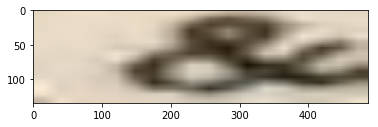

****************************************************************************************************
The matched synthetic images are


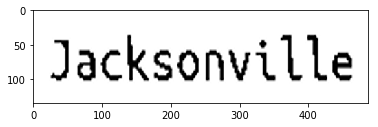

The synthetic word is:  Jacksonville
Distance: 25.844537735


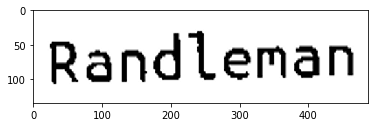

The synthetic word is:  Randleman
Distance: 25.8445663452


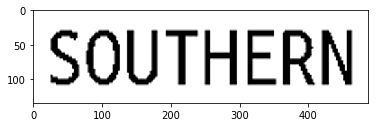

The synthetic word is:  SOUTHERN
Distance: 25.8445892334


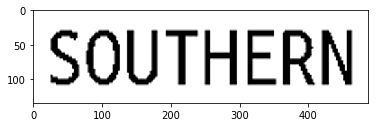

The synthetic word is:  SOUTHERN
Distance: 25.8445892334


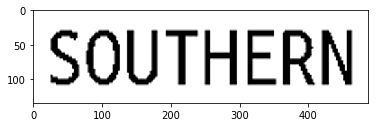

The synthetic word is:  SOUTHERN
Distance: 25.8445892334
****************************************************************************************************
the original word is:  18


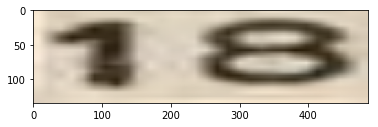

****************************************************************************************************
The matched synthetic images are


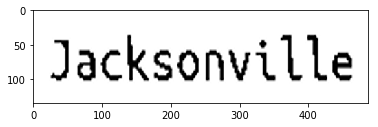

The synthetic word is:  Jacksonville
Distance: 16.3657436371


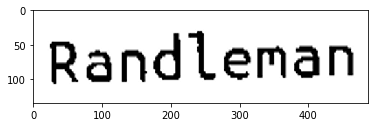

The synthetic word is:  Randleman
Distance: 16.3657722473


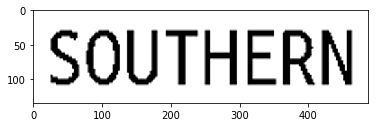

The synthetic word is:  SOUTHERN
Distance: 16.3657932281


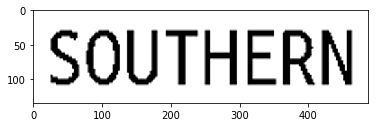

The synthetic word is:  SOUTHERN
Distance: 16.3657932281


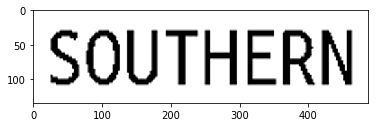

The synthetic word is:  SOUTHERN
Distance: 16.3657932281
****************************************************************************************************
the original word is:  S.


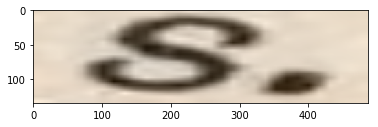

****************************************************************************************************
The matched synthetic images are


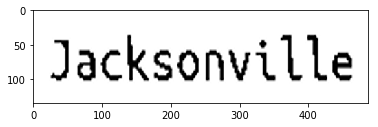

The synthetic word is:  Jacksonville
Distance: 33.6865158081


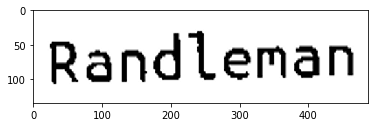

The synthetic word is:  Randleman
Distance: 33.6865463257


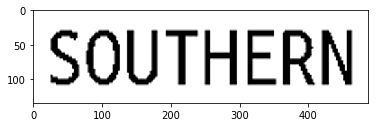

The synthetic word is:  SOUTHERN
Distance: 33.6865692139


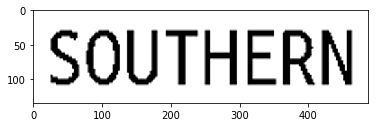

The synthetic word is:  SOUTHERN
Distance: 33.6865692139


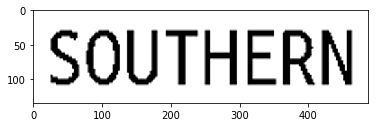

The synthetic word is:  SOUTHERN
Distance: 33.6865692139
****************************************************************************************************
the original word is:  SOU.


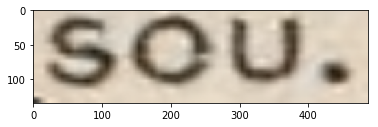

****************************************************************************************************
The matched synthetic images are


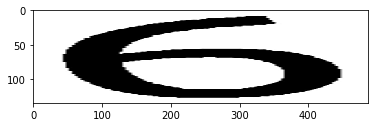

The synthetic word is:  6
Distance: 3.53026103973


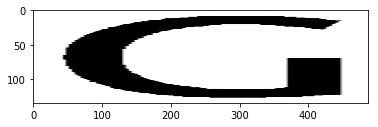

The synthetic word is:  G
Distance: 3.53032064438


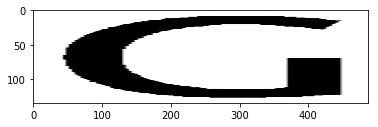

The synthetic word is:  G
Distance: 3.53032064438


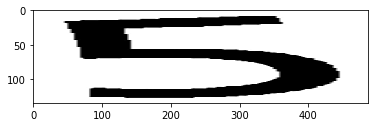

The synthetic word is:  5
Distance: 3.53046607971


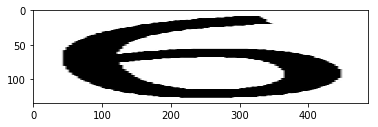

The synthetic word is:  6
Distance: 3.53050756454
****************************************************************************************************
the original word is:  C


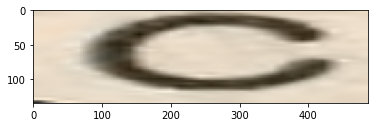

****************************************************************************************************
The matched synthetic images are


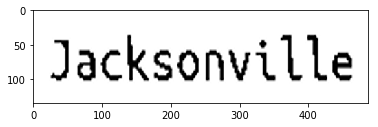

The synthetic word is:  Jacksonville
Distance: 32.8808403015


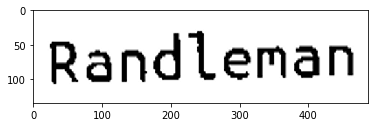

The synthetic word is:  Randleman
Distance: 32.8808708191


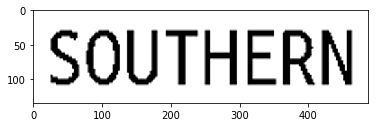

The synthetic word is:  SOUTHERN
Distance: 32.8808937073


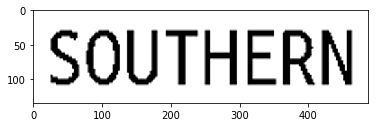

The synthetic word is:  SOUTHERN
Distance: 32.8808937073


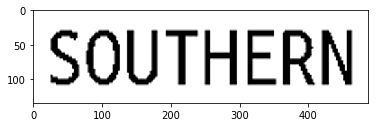

The synthetic word is:  SOUTHERN
Distance: 32.8808937073
****************************************************************************************************


In [11]:
# rank top 5 for each and display
for i in range(50):
    dis_vals_sub = np.array(dis_vals[i])
    qualified_ids = dis_vals_sub.argsort()[0:5]
    print('the original word is: ', original_words[i])
    plt.imshow(original_images[i])
    plt.show()
    print("*"*100)
    print('The matched synthetic images are')
    for j in qualified_ids:
        plt.imshow(synthetic_word_images[j])
        plt.show()
        print('The synthetic word is: ',list_of_words[j])
        print('Distance:', dis_vals_sub[j])
    print("*"*100)

In [14]:
count_5 = 0
count_3 = 0
for i in range(len(resultant_vectors_left)):
    dis_vals_sub = np.array(dis_vals[i])
    qualified_ids_5 = dis_vals_sub.argsort()[0:5]
    qualified_ids_3 = dis_vals_sub.argsort()[0:3]
    count_5 = count_5+int(original_words[i] in list_of_words[qualified_ids_5])
    count_3 = count_3+int(original_words[i] in list_of_words[qualified_ids_3])
accuracy_5 = float(count_5)/float(len(resultant_vectors_left))
accuracy_3 = float(count_3)/float(len(resultant_vectors_left))

print('top 3 accuracy is: ',accuracy_3*100, '% and top 5 accuracy is: ', accuracy_5*100, '%')

top 3 accuracy is:  0.698893418754 % and top 5 accuracy is:  1.39778683751 %
